In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=.2, random_state=42)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.utils import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential(
    [
        Embedding(500, 16, input_length=100),
        LSTM(8),
        Dense(1, activation='sigmoid')
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


313/313 [==============================] - 7s 18ms/step - loss: 0.6926 - accuracy: 0.5292 - val_loss: 0.6920 - val_accuracy: 0.5554
Epoch 2/100
  9/313 [..............................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5747

c:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 17ms/step - loss: 0.6903 - accuracy: 0.5972 - val_loss: 0.6885 - val_accuracy: 0.5978
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6759 - accuracy: 0.6426 - val_loss: 0.6538 - val_accuracy: 0.6718
Epoch 4/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6351 - accuracy: 0.6830 - val_loss: 0.6246 - val_accuracy: 0.6938
Epoch 5/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6117 - accuracy: 0.7098 - val_loss: 0.6052 - val_accuracy: 0.7128
Epoch 6/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5919 - accuracy: 0.7281 - val_loss: 0.5884 - val_accuracy: 0.7240
Epoch 7/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5741 - accuracy: 0.7408 - val_loss: 0.5729 - val_accuracy: 0.7356
Epoch 8/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5577 - accuracy: 0.7520 - val_loss: 0.5571 - val_accuracy: 0.7500
Epoc

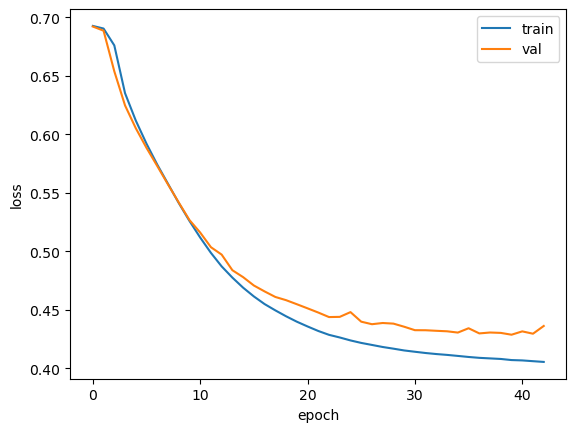

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model2 = Sequential(
    [
        Embedding(500, 16, input_length=100),
        LSTM(8 ,dropout=.3),
        Dense(1, activation='sigmoid')
    ]
)

In [ ]:
rmsprop = RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 22ms/step - loss: 0.6924 - accuracy: 0.5281 - val_loss: 0.6919 - val_accuracy: 0.5484
Epoch 2/100
  7/313 [..............................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5379

c:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6s 20ms/step - loss: 0.6907 - accuracy: 0.5719 - val_loss: 0.6897 - val_accuracy: 0.5858
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6874 - accuracy: 0.6044 - val_loss: 0.6849 - val_accuracy: 0.6226
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6796 - accuracy: 0.6385 - val_loss: 0.6723 - val_accuracy: 0.6640
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6516 - accuracy: 0.6806 - val_loss: 0.6156 - val_accuracy: 0.7202
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5847 - accuracy: 0.7176 - val_loss: 0.5662 - val_accuracy: 0.7256
Epoch 7/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5576 - accuracy: 0.7323 - val_loss: 0.5456 - val_accuracy: 0.7424
Epoch 8/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5374 - accuracy: 0.7497 - val_loss: 0.5319 - val_accuracy: 0.7532
Epoc

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


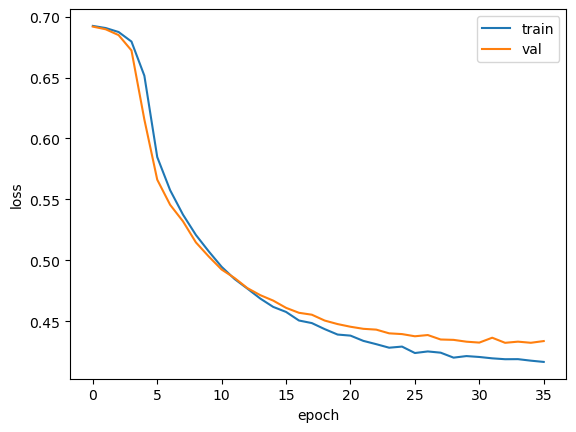

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [4]:
model3 = Sequential(
    [
        Embedding(500, 16, input_length=100),
        LSTM(8 ,dropout=.3, return_sequences=True),
        LSTM(8 ,dropout=.3),
        Dense(1, activation='sigmoid')
    ]
)

In [5]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 100, 8)            800       
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
rmsprop = RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 20s 38ms/step - loss: 0.6930 - accuracy: 0.5142 - val_loss: 0.6927 - val_accuracy: 0.5482
Epoch 2/100
 11/313 [>.............................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5327

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 12ms/step - loss: 0.6924 - accuracy: 0.5588 - val_loss: 0.6919 - val_accuracy: 0.5626
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6904 - accuracy: 0.5808 - val_loss: 0.6887 - val_accuracy: 0.6038
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6838 - accuracy: 0.6141 - val_loss: 0.6776 - val_accuracy: 0.6096
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6598 - accuracy: 0.6443 - val_loss: 0.6359 - val_accuracy: 0.6662
Epoch 6/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6030 - accuracy: 0.6863 - val_loss: 0.5751 - val_accuracy: 0.7076
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5586 - accuracy: 0.7222 - val_loss: 0.5456 - val_accuracy: 0.7280
Epoch 8/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5371 - accuracy: 0.7378 - val_loss: 0.5285 - val_accuracy: 0.7390
Epoc

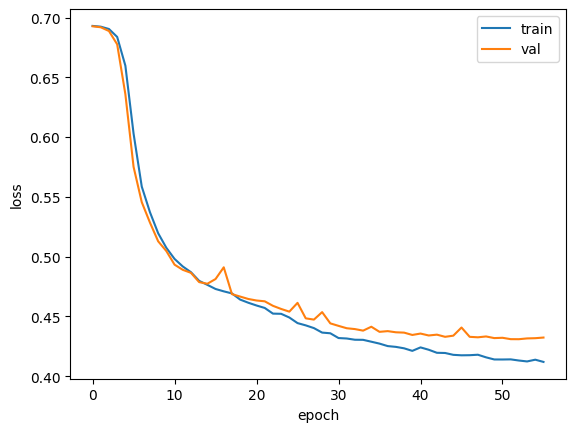

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [9]:
from tensorflow.keras.layers import GRU

In [10]:

model4 = Sequential(
    [
        Embedding(500, 16, input_length=100),
        GRU(8),
        Dense(1, activation='sigmoid')
    ]
)

In [11]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
rmsprop = RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 18ms/step - loss: 0.6925 - accuracy: 0.5174 - val_loss: 0.6919 - val_accuracy: 0.5362
Epoch 2/100
  9/313 [..............................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5434

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 8ms/step - loss: 0.6904 - accuracy: 0.5670 - val_loss: 0.6897 - val_accuracy: 0.5700
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6874 - accuracy: 0.5857 - val_loss: 0.6863 - val_accuracy: 0.5884
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6829 - accuracy: 0.6050 - val_loss: 0.6814 - val_accuracy: 0.5988
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6762 - accuracy: 0.6211 - val_loss: 0.6742 - val_accuracy: 0.6136
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6664 - accuracy: 0.6316 - val_loss: 0.6631 - val_accuracy: 0.6266
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6513 - accuracy: 0.6492 - val_loss: 0.6458 - val_accuracy: 0.6434
Epoch 8/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6267 - accuracy: 0.6730 - val_loss: 0.6163 - val_accuracy: 0.6730
Epoch 9/1

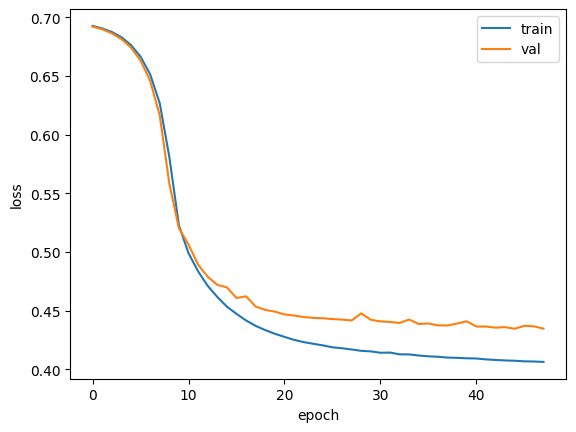

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [14]:
from tensorflow.keras.models import load_model

In [15]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 5s 6ms/step - loss: 0.4237 - accuracy: 0.8016


[0.4237230718135834, 0.8015999794006348]